<a href="https://colab.research.google.com/github/vinurajd/google_collab_DL/blob/master/Fashion_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import tensorflow as tf
import tensorflow_datasets as tfds
import math 
import numpy
import logging
import matplotlib.pyplot as plt

In [105]:
tfds.disable_progress_bar()

logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [106]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_data, test_data = dataset['train'], dataset['test']

In [107]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

In [109]:
def normalize_img(img, labels):
  img = tf.cast(img,tf.float32)/255
  return img, labels

In [110]:
train_data=train_data.map(normalize_img)
test_data=test_data.map(normalize_img)

train_data=train_data.cache()
test_data=test_data.cache()

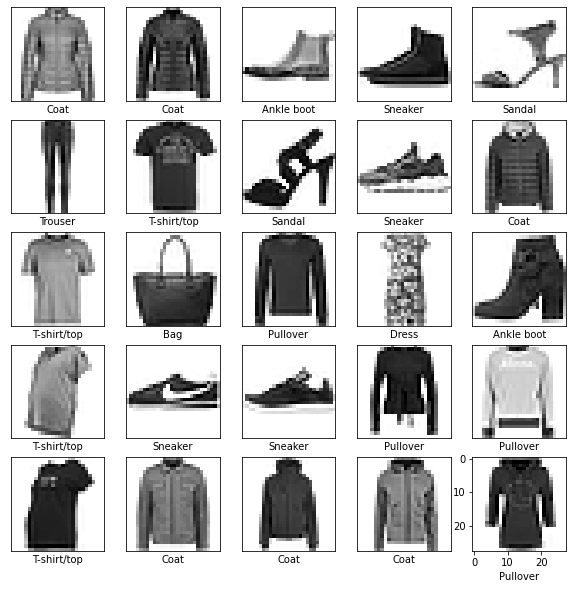

In [111]:
i=0
plt.figure(figsize=(10,10))
for (img, label) in test_data.take(25):
  img=img.numpy().reshape((28,28))
  plt.xticks([])
  plt.yticks([])
  plt.subplot(5,5,i+1)
  plt.imshow(img,cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1

plt.show()

In [112]:
cnn_model = tf.keras.Sequential([
tf.keras.layers.Conv2D(128,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28,28,1)),
tf.keras.layers.MaxPooling2D((2,2),strides=2),
tf.keras.layers.Conv2D(256,(3,3),activation=tf.nn.relu,padding='same'),
tf.keras.layers.MaxPooling2D((2,2),strides=2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128,activation=tf.nn.relu),
tf.keras.layers.Dense(10,activation=tf.nn.softmax)                                 
])

In [113]:
cnn_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 14, 14, 256)       295168    
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 7, 7, 256)         0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               1605760   
_________________________________________________________________
dense_34 (Dense)             (None, 10)              

In [114]:
cnn_model.compile(loss=tf.losses.SparseCategoricalCrossentropy(),
                  optimizer="adam",
                  metrics=['accuracy'])

In [115]:
BATCH_SIZE=32
train_data=train_data.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_data=test_data.cache().batch(BATCH_SIZE)

In [116]:
cnn_model.fit(train_data,epochs=10,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3495 - accuracy: 0.8751
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2244 - accuracy: 0.9181
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1775 - accuracy: 0.9341
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1459 - accuracy: 0.9453
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1127 - accuracy: 0.9583
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0898 - accuracy: 0.9664
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0738 - accuracy: 0.9731
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0593 - accuracy: 0.9778
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0475 - accuracy: 0.9830
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - los

In [117]:
test_loss, test_accuracy = cnn_model.evaluate(test_data, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.3916 - accuracy: 0.9215
Accuracy on test dataset: 0.921500027179718
